## Setup

In [99]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
def load_continuous_messages(filepath, proj='pca', return_orig=False):
    """
    Preprocess continuous messages. Does PCA reduction to two dimensions.
    """
    npzs = np.load(filepath)
    npzs = {x: npzs[x] for x in npzs.files}

    if proj == 'pca':
        msgs_proj = PCA(2).fit_transform(npzs['msgs'])
    elif proj == 'tsne':
        msgs_proj = TSNE(2).fit_transform(npzs['msgs'])
    else:
        raise ValueError("Unknown projection {}".format(proj))
    
    msgs = pd.DataFrame({
        'x': msgs_proj[:, 1],
        'y': msgs_proj[:, 0],
        'correct': np.all(npzs['preds'] == npzs['obs'], axis=1),
        'relation_dir': npzs['relation_dirs'],
        'relation': npzs['relations'],
        'relation_pair': pd.Series(list(zip(npzs['relation_dirs'], npzs['relations'])))
    })
    if return_orig:
        return msgs, npzs
    else:
        return msgs

def plot2d(msgs, hue='relation_pair'):
    """Plot PCA-reduced messages, colored by relation or other factor"""
    sns.lmplot('x', 'y', data=msgs, fit_reg=False, hue=hue, legend_out=True,
           scatter_kws={'s': 10, 'alpha': 0.3})
    
def load_discrete_messages(filepath):
    """
    Preprocess continuous messages. Does PCA reduction to two dimensions.
    """
    npzs = np.load(filepath)
    npzs = {x: npzs[x] for x in npzs.files}
    
    # Must be one-hot
    assert np.all(npzs['msgs'].sum(axis=1) == 1)
    tokens = np.argwhere(npzs['msgs'])[:, 1]

    # Convert one-hot to int tokens
    msgs = pd.DataFrame({
        'tokens': tokens,
        'correct': np.all(npzs['preds'] == npzs['obs'], axis=1),
        'relation_dir': npzs['relation_dirs'],
        'relation': npzs['relations'],
        'relation_pair': pd.Series(list(zip(npzs['relation_dirs'], npzs['relations'])))
    })
    return msgs

## Analysis: Feature model

With a model that gets clean indicators for image features (i.e. the Shapeworld World data), messages show clean relational structure in both continuous and discrete forms:

## Discrete

In [92]:
msgs = load_discrete_messages('data/500_500_asymTrue-end2end-gru-discrete2-30epochs-msgs.npz')
msgs[msgs.tokens == 1]

,correct,relation,relation_dir,relation_pair,tokens
0,False,False,False,"(False, False)",1
1,False,False,False,"(False, False)",1
2,False,False,False,"(False, False)",1
3,False,True,True,"(True, True)",1
4,False,True,False,"(False, True)",1
5,False,True,True,"(True, True)",1
6,False,True,False,"(False, True)",1
7,False,False,True,"(True, False)",1
8,False,False,False,"(False, False)",1
9,True,True,False,"(False, True)",1


# Continuous

Exact accuracy: 0.8116629464285714


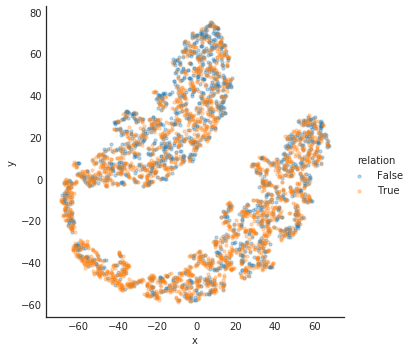

In [105]:
msgs = load_continuous_messages('data/500_500_asymTrue-end2end-gru-continuous64-30epochs-msgs.npz',
                               proj='tsne')
print("Exact accuracy: {}".format(msgs.correct.mean()))
plot2d(msgs, hue='relation')

Exact accuracy: 0.8116629464285714


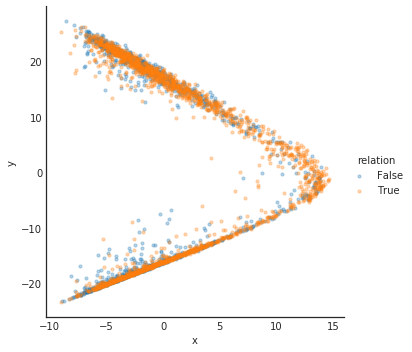

In [108]:
msgs = load_continuous_messages('data/500_500_asymTrue-end2end-gru-continuous64-30epochs-msgs.npz',
                               proj='pca')
print("Exact accuracy: {}".format(msgs.correct.mean()))
plot2d(msgs, hue='relation')

However, this isn't too interesting - we want to explore structure emerging from end-to-end models which have to process raw image data.

# Analysis: End to end models

## Experiment 1: 

The first experiment is an encoder-decoder model with a *continuous* message of dimensionality 128, playing a 3 pick 2 game. We find that messages encode no compositional structure, and thus generalize very poorly. Interestingly, depending on the tensorflow seed, we get different test accuracies trainin - sometimes 75%, sometimes 37.5%. It seems the nets settle on some local optimum depending on the game configurations it gets, which only happen to work on a certain number of other game configurations.

We can figure out what exactly these communication protocols mean, but that's a bit annoying...so will just move on for now.

In [46]:
msgs = load_discrete_messages('data/500_200-feature-gru-discrete2-25epochs-msgs.npz')
msgs[msgs.tokens == 1].head(20)

,correct,relation,relation_dir,relation_pair,tokens
0,True,False,False,"(False, False)",1
2,True,False,True,"(True, False)",1
3,True,True,False,"(False, True)",1
4,True,True,False,"(False, True)",1
5,True,False,True,"(True, False)",1
6,True,False,False,"(False, False)",1
7,True,False,False,"(False, False)",1
10,True,True,False,"(False, True)",1
11,True,True,True,"(True, True)",1
13,True,False,False,"(False, False)",1


# Computing message predictions for alternative images

In [21]:
import tensorflow as tf
session = tf.Session()

In [22]:
saver = tf.train.Saver()
saver.restore(session, 'saves/data/checkpoint')

ValueError: No variables to save